**IMPORTING LIBRARIES**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

 #load the dataset
dataset = pd.read_csv('/content/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
nRow, nCol = dataset.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 1338 rows and 7 columns.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#impute the missing values
from sklearn.impute import SimpleImputer

cols = dataset.columns
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train = pd.DataFrame(imp_mean.fit_transform(dataset), columns= cols)

train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
numeric_data = dataset.select_dtypes(include=[np.number])
categorical_data = dataset.select_dtypes(exclude=[np.number])

print("Numeric Data")
numeric_data.info()

print("\n\n Categorical Data")
categorical_data.info()

Numeric Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


 Categorical Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [ ]:
def analyse_cats(df, cat_cols):
    d = pd.DataFrame()
    cl = []
    u = []
    s =[]
    nans =[]
    for c in cat_cols:
        #print("column:" , c ,"--Uniques:" , train[c].unique(), "--Cardinality:", train[c].unique().size)
        cl.append(c)
        u.append(df[c].unique())
        s.append(df[c].unique().size)
        nans.append(df[c].isnull().sum())
        
       # plt.figure(figsize=(12, 5))
        #sns.countplot(train[c], palette='bone');
        
    d['"feat"'] = cl
    d["uniques"] = u
    d["cardinality"] = s
    d["nans"] = nans

    return d

catanadf = analyse_cats(train, categorical_data)
catanadf

,"""feat""",uniques,cardinality,nans
0,sex,"[female, male]",2,0
1,smoker,"[yes, no]",2,0
2,region,"[southwest, southeast, northwest, northeast]",4,0


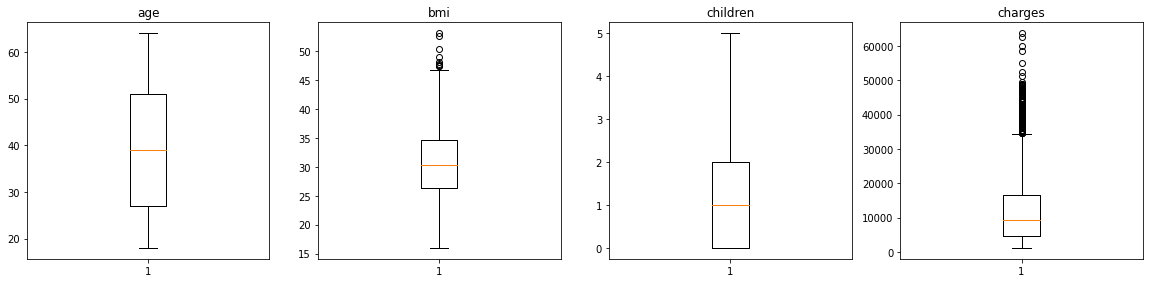

In [ ]:
col = 4
rows = 4
fig = plt.figure(figsize = (20,20))
ax = []
series = numeric_data.columns

for idx, s in enumerate(series):
  ax.append(fig.add_subplot(rows, col, idx+1))
  ax[-1].set_title(s)
  plt.boxplot(train[s])

In [ ]:
#remove outliers

for col in series:
  Q1 = train[col].quantile(0.25)
  Q3 = train[col].quantile(0.75)
  IQR = Q3-Q1
  data_clean = train[~((train[col] < (Q1-1.5*IQR)) | (train[col] > (Q3+1.5*IQR)))]

In [ ]:
data_clean.shape

(1199, 7)

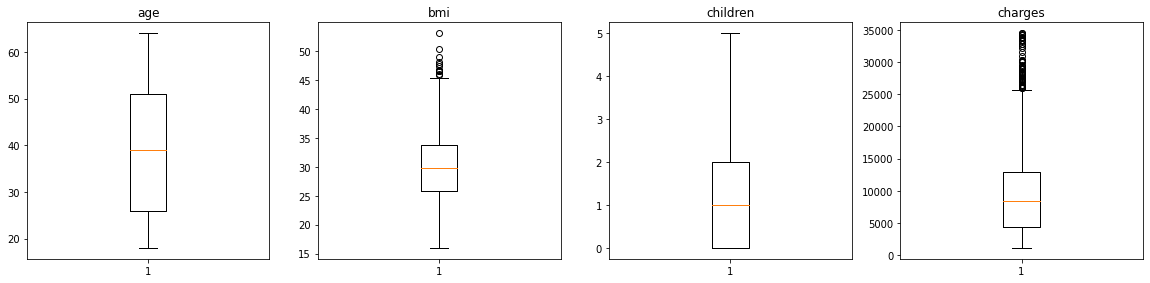

In [ ]:
col = 4
rows =4
fig = plt.figure(figsize=(20,20))
ax = []
series = numeric_data.columns

for idx,s in enumerate(series):
  ax.append(fig.add_subplot(rows,col,idx+1))
  ax[-1].set_title(s)
  plt.boxplot(data_clean[s])

In [ ]:
train = data_clean

In [ ]:
# convert categorical data to numeric data

#use one hot encoder
from sklearn.preprocessing import LabelEncoder
for col in categorical_data:
    le = LabelEncoder() 
    train[col]  = le.fit_transform(train[col].astype(str)) 
    
train[categorical_data.columns]

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


In [ ]:
train

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.9
1,18,1,33.77,1,0,2,1725.55
2,28,1,33,3,0,2,4449.46
3,33,1,22.705,0,0,1,21984.5
4,32,1,28.88,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,30.97,3,0,1,10600.5
1334,18,0,31.92,0,0,0,2205.98
1335,18,0,36.85,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.94


Text(0.5, 1.0, 'Distribution of Charges')

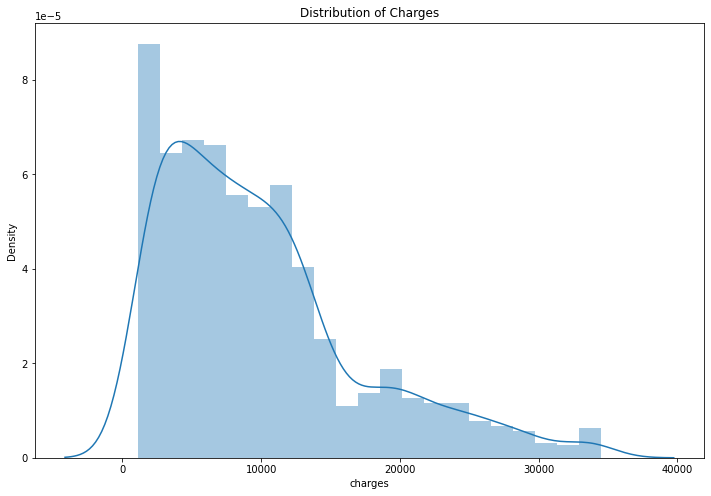

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(train['charges'])
plt.title('Distribution of Charges')

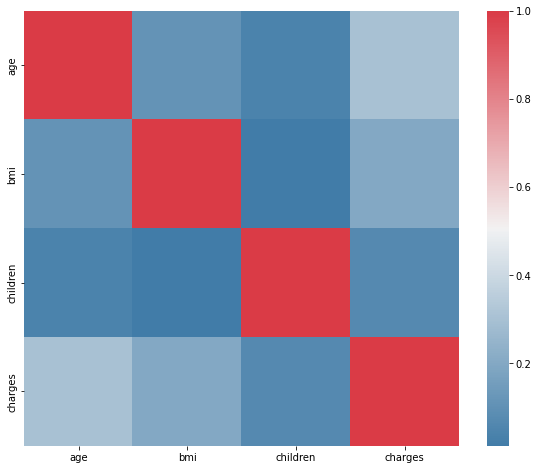

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

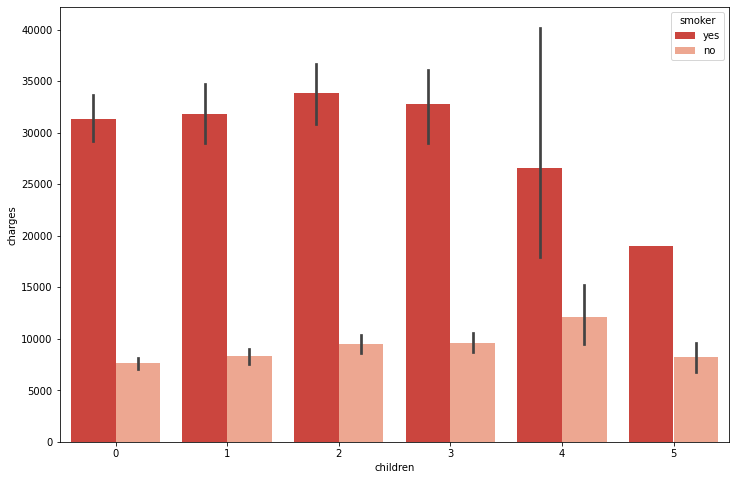

In [ ]:
charges = dataset['charges'].groupby(dataset.children).sum().sort_values(ascending = True)
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'children', y = 'charges',
                 hue='smoker', data=dataset, palette='Reds_r')

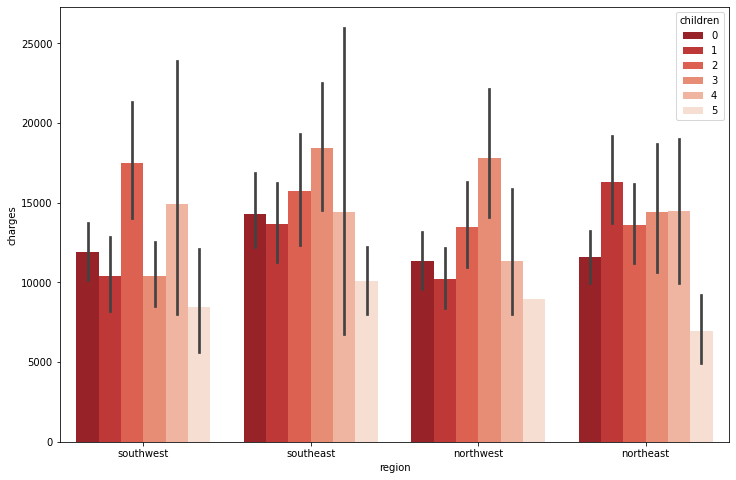

In [ ]:
charges = dataset['charges'].groupby(dataset.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='children', data=dataset, palette='Reds_r')

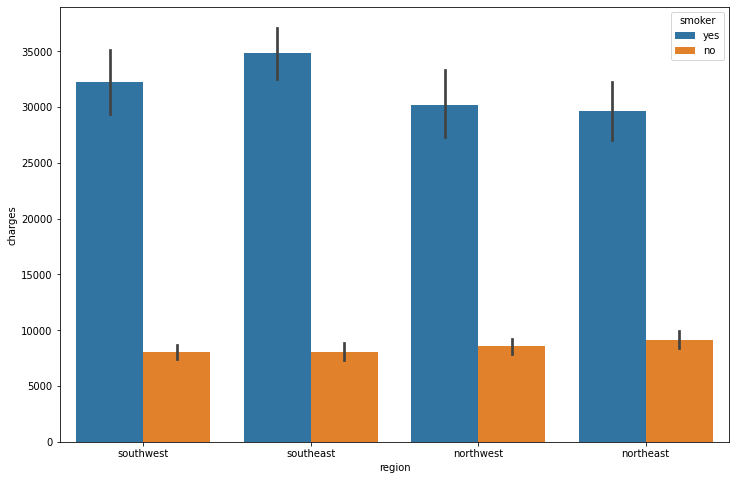

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='smoker', data=dataset)

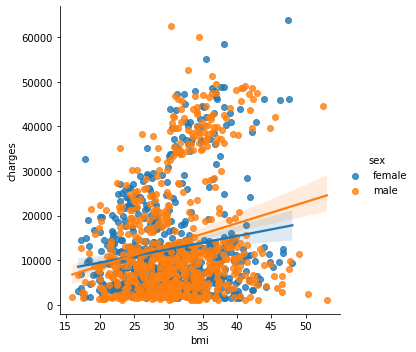

In [ ]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=dataset, hue='sex')


Model

In [ ]:
# Seperate the independent and dependent variables
Y = train.pop("charges")  #dependent variable vector
X = train.values

In [ ]:
print(type(X))

<class 'numpy.ndarray'>


Models:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(839, 6)
(360, 6)


In [ ]:
from sklearn.ensemble import RandomForestRegressor as Rfr
from sklearn import metrics

Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,Y_train)
x_train_pred = Rfr.predict(X_train)
x_test_pred = Rfr.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, Y_train),
       metrics.mean_squared_error(x_test_pred, Y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(Y_train,x_train_pred),
       metrics.r2_score(Y_test,x_test_pred)))

MSE train data: 3078047.839, MSE test data: 20184544.884
R2 train data: 0.944, R2 test data: 0.572


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


Lasso = Lasso(alpha=0.01)
Lasso.fit(X_train, Y_train)
print(f'Lasso intercept: {Lasso.intercept_}')
print(f'Lasso Coefficients: {Lasso.coef_}')
print(f'accuracy: {Lasso.score(X_test, Y_test)}')


Lasso intercept: -2144.6657439366354
Lasso Coefficients: [  237.31236986  -293.38390569    60.02934597   453.39109486
 14356.93695084  -598.99921098]
accuracy: 0.6328806223954762


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train, Y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_test, Y_test))

-2098.9180912549655
[  237.27132084  -290.66362426    58.85811616   453.57200924
 14271.48419841  -599.09735627]
0.632552337792021
